In [2]:
import numpy as np

In [4]:
lista = [1, 2, 3, 4]
np.array(lista)

array([1, 2, 3, 4])

In [6]:
np.zeros((2,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [8]:
np.zeros((3, 3, 3), "int32")

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=int32)

In [18]:
array = np.zeros((3, 3, 3))

In [12]:
np.random.uniform(0,1,9)

array([ 0.08818654,  0.14820864,  0.02446257,  0.00092472,  0.0490143 ,
        0.0098638 ,  0.43808325,  0.33851852,  0.45265693])

In [14]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [20]:
print array.shape

(3, 3, 3)


In [24]:
import pandas as pd

In [62]:
import seaborn as sns
%matplotlib inline  


In [28]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
X = tips['size']

In [40]:
Y = tips.tip

In [42]:
Y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [44]:
print X.shape
print Y.shape

(244,)
(244,)


In [49]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


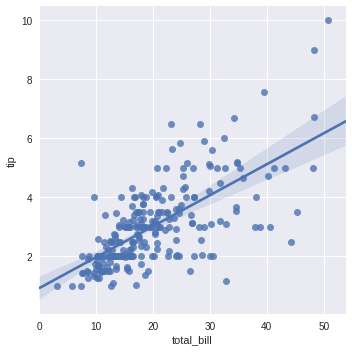

In [63]:
sns.lmplot(x="total_bill", y="tip", data=tips)

In [65]:
treino_index = np.random.rand(len(X))<0.7
X_treino = X[treino_index]
X_teste = X[~treino_index]
Y_treino = Y[treino_index]
Y_teste = Y[~treino_index]

In [68]:
print (X_teste.shape, Y_teste.shape, X_treino.shape, Y_treino.shape)

((71,), (71,), (173,), (173,))


In [72]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [74]:
lm = LinearRegression()

In [86]:
# Passo necessário apenas com uma feature
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
print X_train.shape

(183, 1)


In [88]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [96]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


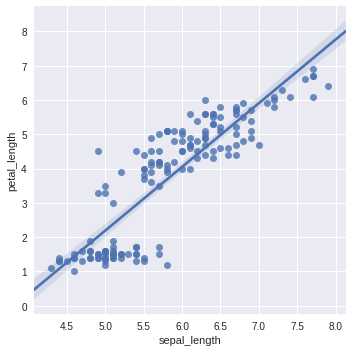

In [102]:
sns.lmplot(x="sepal_length",y="petal_length", data=iris)

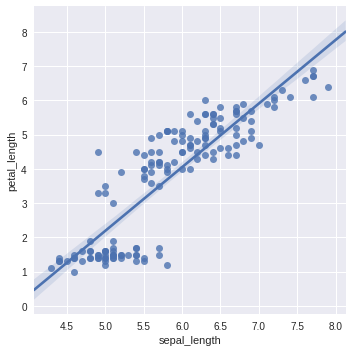

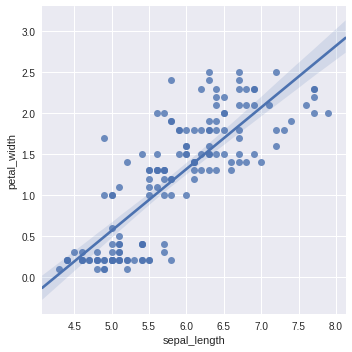

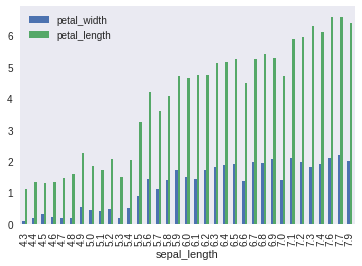

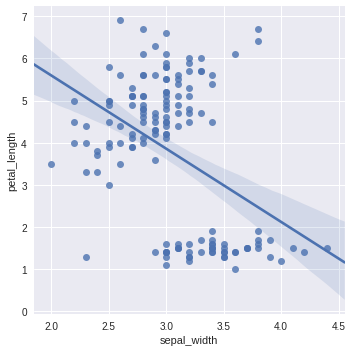

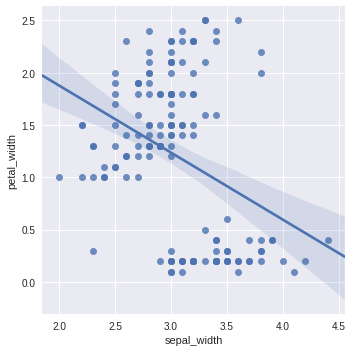

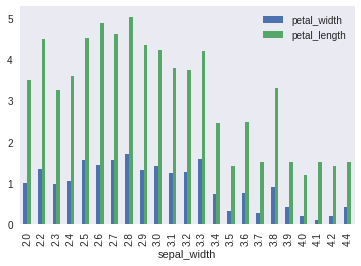

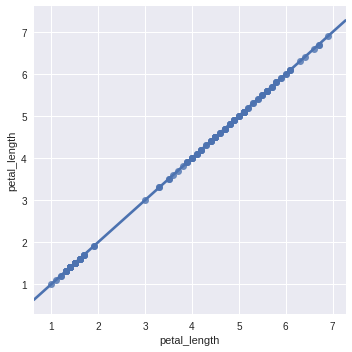

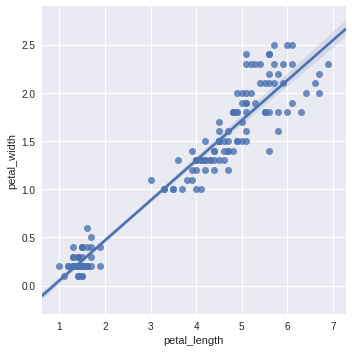

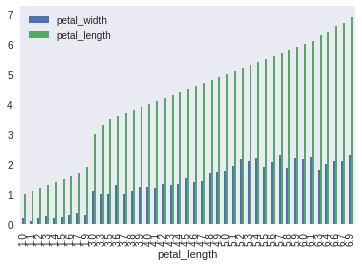

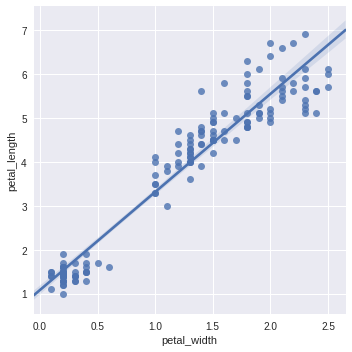

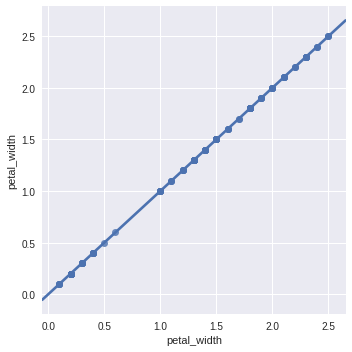

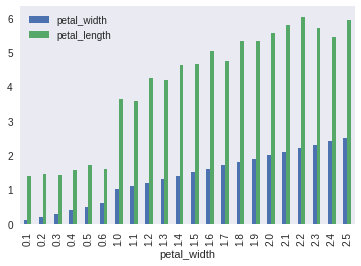

In [107]:
for att in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    gp = iris.groupby(att).agg({'petal_length': np.mean, 'petal_width': np.mean})
    sns.lmplot(x=att, y='petal_length', data=iris)
    sns.lmplot(x=att, y='petal_width', data=iris)
    gp.plot(kind='bar', stacked=False, grid=False)
    
    